# Homework 1 (Due 01/12/2024)

In [7]:
# importing packages and custom modules
import sys
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.ticker as mtick

#importing external planck function to compare to
from astropy.modeling.physical_models import BlackBody
from astropy import units

sys.path.append("../")
from ASTRO530.functions import planck
from ASTRO530 import plotting

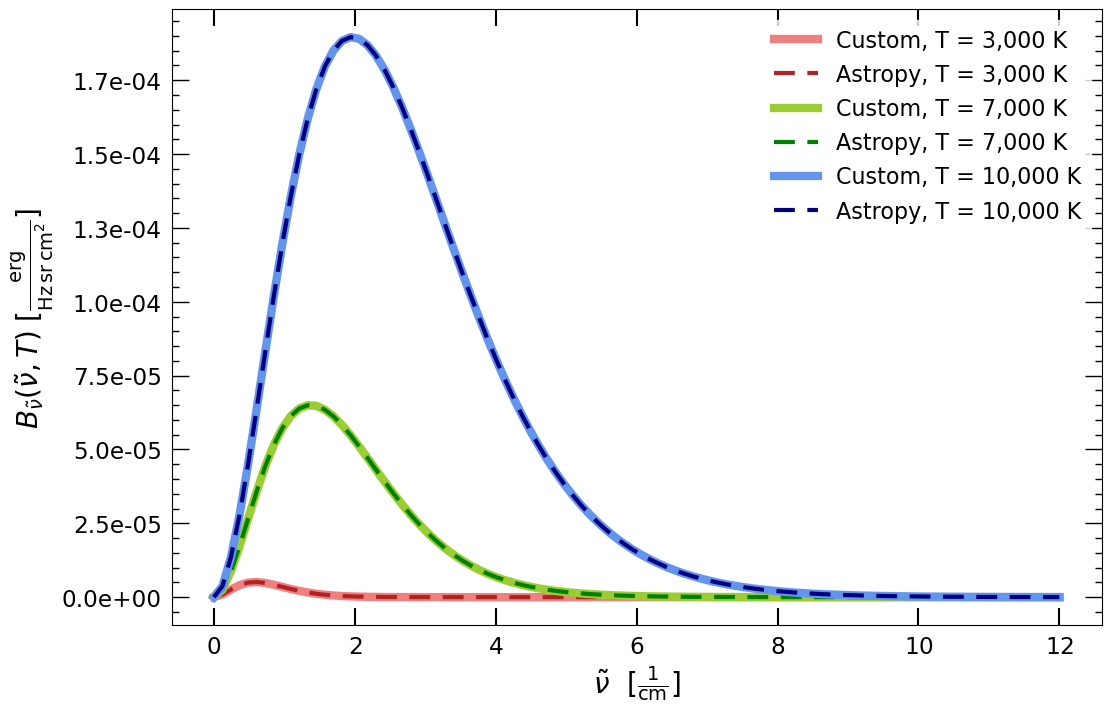

In [26]:
# creating vector of wavenumbers (inverse microns)
nu_tilde_microns = np.linspace(0.0001,12,100) / units.micron # ~0 to 12 microns^-1
nu_tilde = nu_tilde_microns.to(1/units.cm)
# calculating and plotting results
fig, ax = plt.subplots(figsize=(12,8))

i = 0
for T in [3000,7000,10000]: 
    B_nu_tilde = planck(nu_tilde,T,x_type="wave number") # converting nu_tilde to inverse cm
    ax.plot(nu_tilde_microns,B_nu_tilde,label=f'Custom, T = {T:,d} K',lw=6,c=['lightcoral','yellowgreen','cornflowerblue'][i])
    astropy_bb = BlackBody(temperature=T*units.K)
    ax.plot(nu_tilde_microns,astropy_bb(1/nu_tilde),label=f'Astropy, T = {T:,d} K',lw=3,c=['firebrick','green','navy'][i],linestyle='dashed',dashes=(5,3))
    i += 1

x_units = nu_tilde.unit.to_string('latex')
y_units = B_nu_tilde.unit.to_string('latex')

ax.set_ylabel(r'$B_{\tilde{\nu}} (\tilde{\nu},T)$' + f' [{y_units}]')
ax.set_xlabel(r'$\tilde{\nu}$ ' + f' [{x_units}]')
ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.1e'))
    
ax.legend()
plt.savefig("../Plots/HW1/B_nu_linear.png")
plt.show()

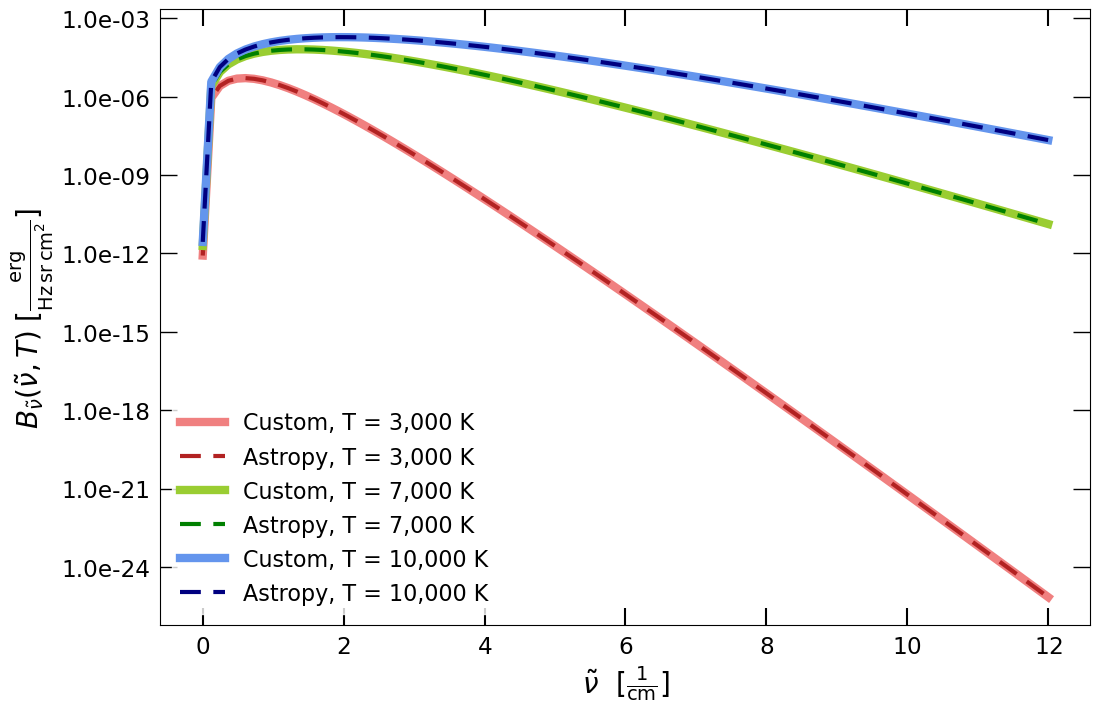

In [27]:
fig, ax = plt.subplots(figsize=(12,8))
plt.yscale('log')

i = 0
for T in [3000,7000,10000]: 
    B_nu_tilde = planck(nu_tilde,T,x_type="wave number") # converting nu_tilde to inverse cm
    ax.plot(nu_tilde_microns,B_nu_tilde,label=f'Custom, T = {T:,d} K',lw=6,c=['lightcoral','yellowgreen','cornflowerblue'][i])
    astropy_bb = BlackBody(temperature=T*units.K)
    ax.plot(nu_tilde_microns,astropy_bb(1/nu_tilde),label=f'Astropy, T = {T:,d} K',lw=3,c=['firebrick','green','navy'][i],linestyle='dashed',dashes=(5,3))
    i += 1

x_units = nu_tilde.unit.to_string('latex')
y_units = B_nu_tilde.unit.to_string('latex')

ax.set_ylabel(r'$B_{\tilde{\nu}} (\tilde{\nu},T)$' + f' [{y_units}]')
ax.set_xlabel(r'$\tilde{\nu}$ ' + f' [{x_units}]')
ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.1e'))
    
ax.legend()
plt.savefig("../Plots/HW1/B_nu_ylog.png")
plt.show()

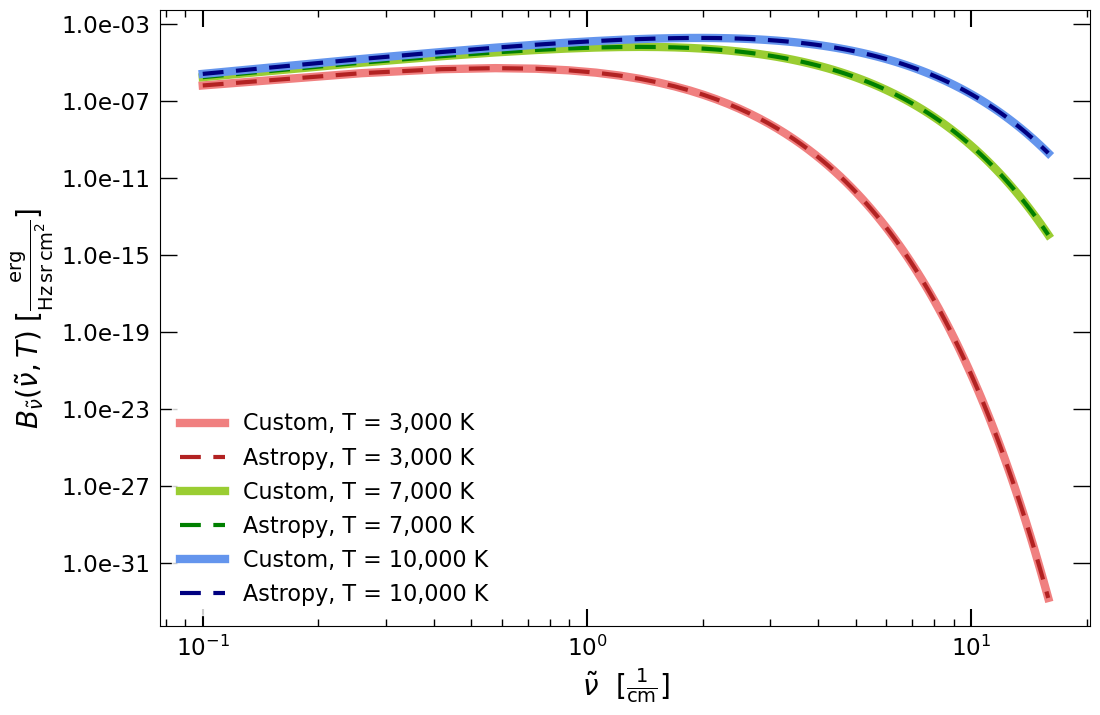

In [25]:
fig, ax = plt.subplots(figsize=(12,8))

# creating vector of wavenumbers (inverse microns)
nu_tilde_microns = np.linspace(10**(-1),10**(1.2),100) / units.micron # ~-1.0 < log nu < 1.2
nu_tilde = nu_tilde_microns.to(1/units.cm)

i = 0
for T in [3000,7000,10000]: 
    B_nu_tilde = planck(nu_tilde,T,x_type="wave number") # converting nu_tilde to inverse cm
    ax.loglog(nu_tilde_microns,B_nu_tilde,label=f'Custom, T = {T:,d} K',lw=6,c=['lightcoral','yellowgreen','cornflowerblue'][i])
    astropy_bb = BlackBody(temperature=T*units.K)
    ax.loglog(nu_tilde_microns,astropy_bb(1/nu_tilde),label=f'Astropy, T = {T:,d} K',lw=3,c=['firebrick','green','navy'][i],linestyle='dashed',dashes=(5,3))
    i += 1

x_units = nu_tilde.unit.to_string('latex')
y_units = B_nu_tilde.unit.to_string('latex')

ax.set_ylabel(r'$B_{\tilde{\nu}} (\tilde{\nu},T)$' + f' [{y_units}]')
ax.set_xlabel(r'$\tilde{\nu}$ ' + f' [{x_units}]')
ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.1e'))
    
ax.legend()
plt.savefig("../Plots/HW1/B_nu_loglog.png")
plt.show()